In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass

In [58]:
@dataclass
class token:
    TOKEN_NAME = 'SPOT'
    DATA = pd.read_csv('USDC_DATA/spot_2.csv')
    PRICE = DATA[['block_timestamp', 'spot_price']].set_index('block_timestamp').dropna().reset_index()
    SPOT_WALLETS = pd.read_csv('SPOT_WALLETS/spot_wallets.csv')
    LIQ_DATA = pd.read_csv('USDC_DATA/usdc_spot.csv')

In [59]:
token.SPOT_WALLETS['balance'].sum()

597813.5794380889

In [60]:
import plotly.graph_objects as go

token.PRICE['block_timestamp'] = pd.to_datetime(token.PRICE['block_timestamp'])

token.PRICE.set_index('block_timestamp', inplace=True)
SPOT_PRICE = token.PRICE["spot_price"].resample("D").ohlc()

fig = go.Figure(data=[go.Candlestick(x=SPOT_PRICE.index,
                open=SPOT_PRICE['open'],
                high=SPOT_PRICE['high'],
                low=SPOT_PRICE['low'],
                close=SPOT_PRICE['close'],)])

In [61]:
fig

In [66]:
SPOT_PRICE.to_csv('./USDC_Data/SPOT_PRICE.csv')

<AxesSubplot: xlabel='block_timestamp'>

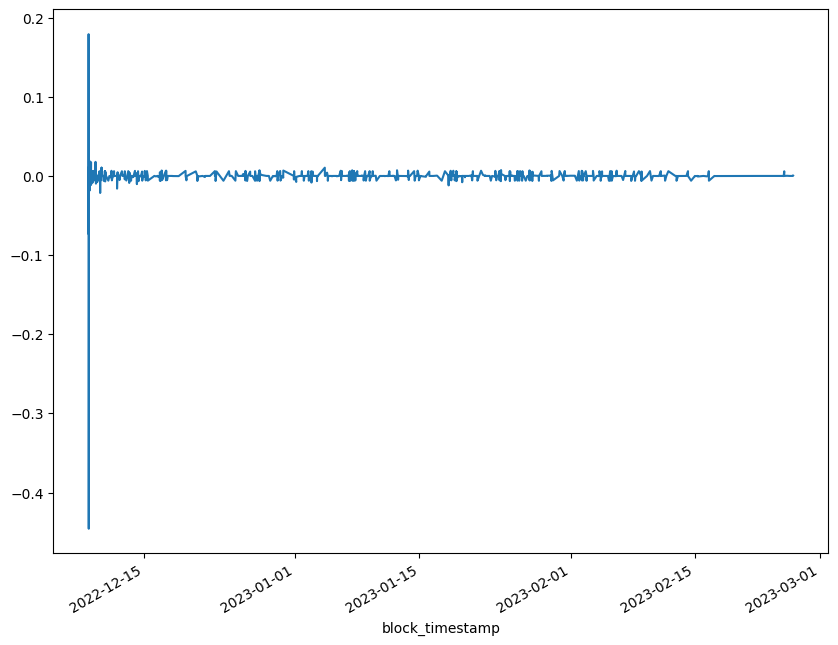

In [75]:
volatility = token.PRICE['spot_price'].pct_change()
volatility.plot(figsize=(10, 8))    

In [74]:
volality = volatility.rolling(30).std() * np.sqrt(30)

<AxesSubplot: xlabel='block_timestamp'>

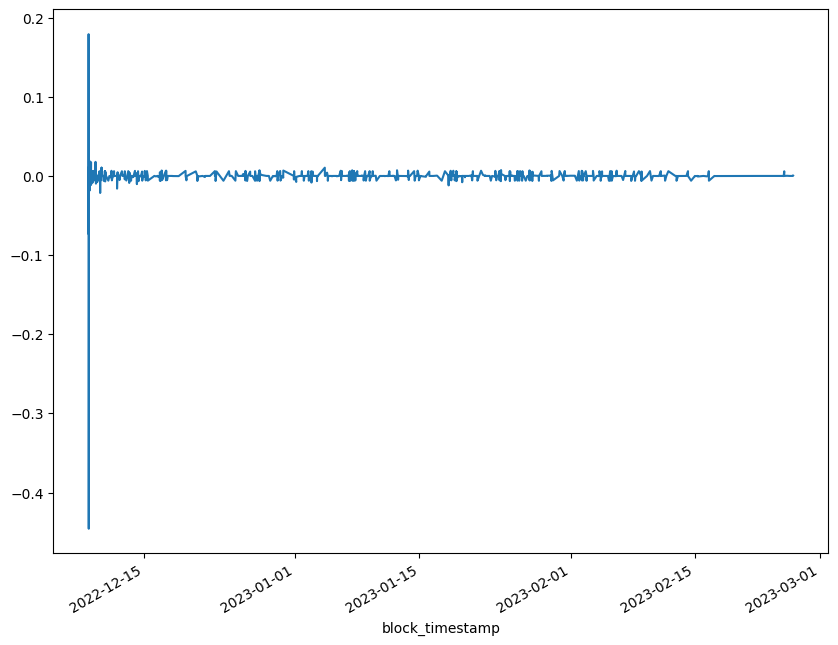

In [71]:
volatility.plot(figsize=(10, 8))

In [76]:
volatility.to_csv('./USDC_Data/SPOT_VOLATILITY.csv')